In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import seaborn as sns
import time
from tqdm import tqdm
import pandas as pd

In [64]:
#define colour scheme and font size for visual representation
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

plt.rcParams['font.family'] = 'serif'
# new color scheme i want bloodred to be the first color

#new color scheme
colors = ['darkred', 'lightblue','darkblude','darkorange', 'gold', 'limegreen',  'darkviolet', 'deeppink', 'black', 'grey']

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

ValueError: Key axes.prop_cycle: 'darkblude' does not look like a color arg

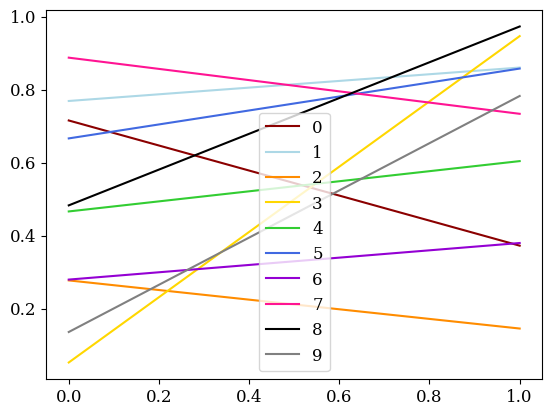

In [65]:
#test color scheme
plt.figure()
for i in range(10):
    plt.plot(np.random.rand(2), label=str(i))
plt.legend()

time it take before reaching the boundary is $L^2$. On average there is grain going in and out
$P(s)~ 1/\tau*exp(s/L^D) $. TH

In [31]:
#defining a grid of size LxL


def grid(L):
    grid = np.zeros((L+1,L+1))
    return grid


def new_neighbours():
    x_val = np.array([-1,1,0,0])  
    y_val = np.array([0,0,-1,1])
    return x_val, y_val

x_val = new_neighbours()[0]
y_val = new_neighbours()[1]


def place_particle(grid):
    L = len(grid)
    #x -= int(L//2)
    #y = int(L//2)
    x = np.random.randint(1,L-1)
    y = np.random.randint(1,L-1)
    grid[x,y] += 1
    return grid



def move_particle(grid, threshold):
    #find the location of the particles
    mask = grid > threshold - 0.5
    x, y = np.where(mask)
    x_len = len(x)
    
    
    if len(x) == 0:
        return grid, 0
    
    y_diff = np.max(y) - np.min(y)
    x_diff = np.max(x) - np.min(x)
    
    big_diff = np.max([x_diff, y_diff])
    
    
    #move the particles
    for i in range(len(x)):
        #find the nearest neighbors
        neighbors = [(x[i]+1,y[i]), (x[i]-1,y[i]), (x[i],y[i]+1), (x[i],y[i]-1)]
        #update all neighbors 
        grid[x[i],y[i]] -= 2
        #update two random neighbors
        n = np.random.randint(0,4)
        grid[neighbors[n]] += 1
        n = np.random.randint(0,4)
        grid[neighbors[n]] += 1
    #set edge of grid to zero
        grid[0,:] = 0
        grid[-1,:] = 0
        grid[:,0] = 0
        grid[:,-1] = 0
    
    return grid, x_len, big_diff



def plot_grid(grid, n):
    g = grid
    plt.imshow(g, cmap='viridis')  # Display the grid
    plt.colorbar()  # Optional, to show a color scale
    
    plt.title(f"Grains moved n = {n}")
    # Add gridlines
    plt.grid(True)
    plt.gca().set_xticks(np.arange(0, g.shape[1], 1), minor=True)
    plt.gca().set_yticks(np.arange(0, g.shape[0], 1), minor=True)
    #plt.grid(which="minor", color="white", linestyle='-', linewidth=1)
    
    # Show the plot
    plt.show()





def simulate_diffusion_loop(L ,threshold, nsteps):
    g = grid(L)
    ava_size = np.zeros(int(nsteps))
    init_time = time.time()
    dimension = np.zeros(int(nsteps))
    for i in tqdm(range(nsteps), desc="Simulating Diffusion",  leave=True):
        
        a  = 0
        g =  place_particle(g)
        n = 0
        max_g = np.max(g)
        diff = 0
      
        while max_g > threshold - 0.5:
            g, a, k = move_particle(g, threshold)
            
            if k > diff:
                diff = k
            n += a
            max_g = np.max(g)
            
        dimension[i] = diff
        ava_size[i] = n
            
        #measure time taking for a 1000 steps
        increment = 10000 
        
        
            
        
      
        
    return ava_size, dimension









In [35]:
#wrtie down the L and L_2 values



#create for entraces for the dimensions

dims = []
avas = []


for i in tqdm(range(len(L)), desc="Simulating Diffusion", ,leave=True):
    print(L[i])
    ava_size, dimensions = simulate_diffusion_loop(int(L[i]), 2, int(L_2[i]))
    
    #make into a list
    dimensions = list(dimensions)
    ava_size = list(ava_size)
    #save the dimensions and ava_size to arrays without ussing append
    dims.append(dimensions)
    avas.append(ava_size)
    
    
    
    
    
 #make into a data frame where the columns are the dimensions and the ava_size





   
    
    

Simulating Diffusion:   0%|          | 0/4 [00:00<?, ?it/s]

25


Simulating Diffusion:   0%|          | 0/4 [00:16<?, ?it/s]


KeyboardInterrupt: 

In [45]:

df = pd.read_csv('soc_RANDOM.csv')

df1 = pd.read_csv('soc_RANDOM_200.csv')

names = df.columns
print(names)
ava_size_25 = df[names[3]]
#drop nan values
ava_size_25 = ava_size_25.dropna()

ava_size_50 = df[names[4]]
ava_size_50 = ava_size_50.dropna()

ava_size_100 = df[names[5]]
ava_size_100 = ava_size_100.dropna()

names1 = df1.columns
print(names1)

ava_size_200 = df1[names1[1]]

ava_collected = [ava_size_25, ava_size_50, ava_size_100, ava_size_200]

#make






Index(['dim_1', 'dim_2', 'dim_3', 'ava_s_1', 'ava_s_2', 'ava_s_3'], dtype='object')
Index(['dim_4', 'ava_s_4'], dtype='object')


In [4]:
'''import pandas as pd
names = ['dim_1', 'dim_2', 'dim_3', 'dim_4', 'ava_s_1', 'ava_s_2', 'ava_s_3', 'ava_s_4']
#make into a data frame where colum are ava_size and dimensions with the corresponding names 


df = pd.DataFrame({
    'dim_1': pd.Series(dims[0]),
    'dim_2': pd.Series(dims[1]),
    'dim_3': pd.Series(dims[2]),
    'dim_4': pd.Series(dims[3]),
    'ava_s_1': pd.Series(avas[0]),
    'ava_s_2': pd.Series(avas[1]),
    'ava_s_3': pd.Series(avas[2]),
    'ava_s_4': pd.Series(avas[3]),
})

# Save to CSV
df.to_csv('data_soc_random.csv', index=False)





'''

"import pandas as pd\nnames = ['dim_1', 'dim_2', 'dim_3', 'dim_4', 'ava_s_1', 'ava_s_2', 'ava_s_3', 'ava_s_4']\n#make into a data frame where colum are ava_size and dimensions with the corresponding names \n\n\ndf = pd.DataFrame({\n    'dim_1': pd.Series(dims[0]),\n    'dim_2': pd.Series(dims[1]),\n    'dim_3': pd.Series(dims[2]),\n    'dim_4': pd.Series(dims[3]),\n    'ava_s_1': pd.Series(avas[0]),\n    'ava_s_2': pd.Series(avas[1]),\n    'ava_s_3': pd.Series(avas[2]),\n    'ava_s_4': pd.Series(avas[3]),\n})\n\n# Save to CSV\ndf.to_csv('data_soc_random.csv', index=False)\n\n\n\n\n\n"

In [46]:
#compute the average avalanche size for time periods of 100 steps

average_ava = [[] for i in range(len(ava_collected))]
max_ava = [[] for i in range(len(ava_collected))]
number_on_zeros = [[] for i in range(len(ava_collected))]
size = 1000

for j in range(len(ava_collected)):
    avasize = ava_collected[j]
    for i in range(0, len(avasize), size):
        average_ava[j].append(np.mean(avasize[i:i+size]))
        max_ava[j].append(np.max(avasize[i:i+size]))
        number_on_zeros[j].append(np.sum(avasize[i:i+size] == 0))
    #compute variance from the mean







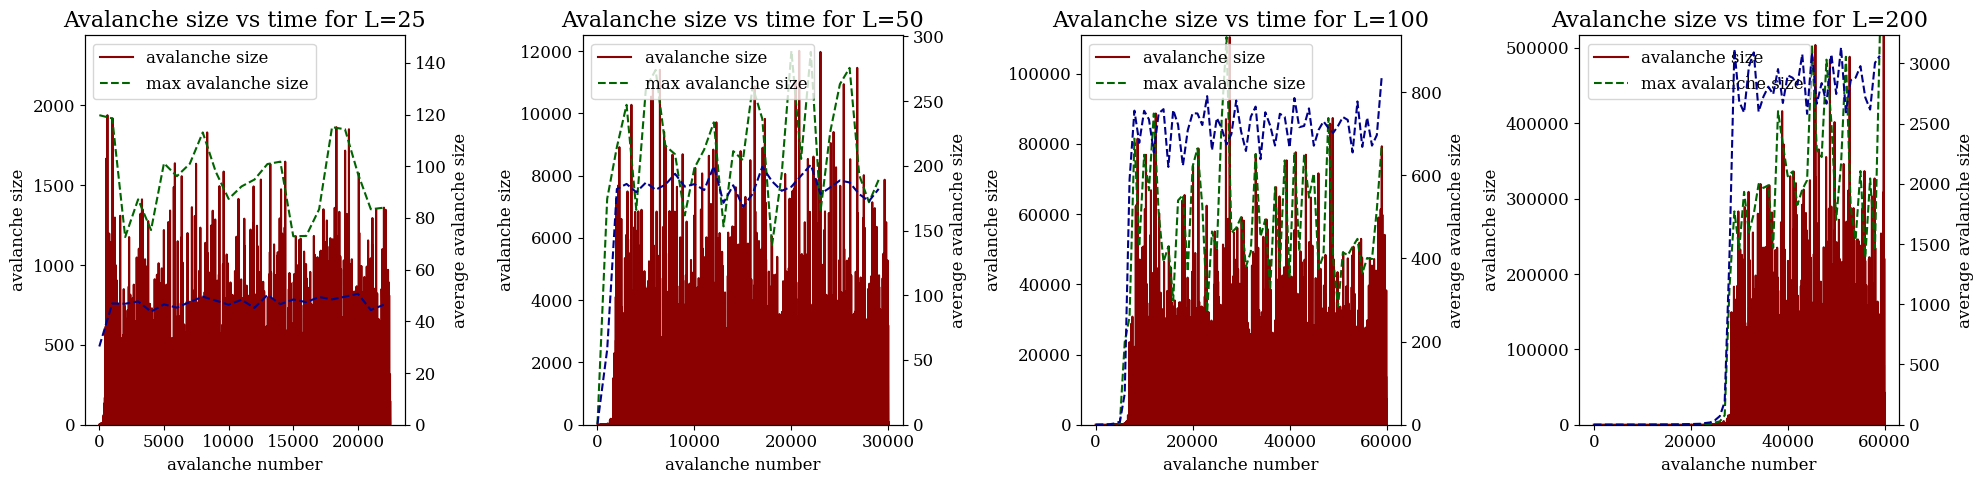

In [50]:
L = [25, 50, 100, 200]
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
ava = ava_collected
for idx, avasize in enumerate(ava):
    t = np.arange(len(avasize))
    axs[idx].plot(t, avasize, color='darkred', label='avalanche size')
    #we want to plot a line of L**2
    axs[idx].set_ylabel('avalanche size')
    axs[idx].set_xlabel('avalanche number')
    axs[idx].set_ylim(0, np.max(avasize) + 500)
    axs[idx].plot(np.arange(0, len(avasize), size), max_ava[idx], color='darkgreen', linestyle='--', label='max avalanche size')
    axs[idx].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)
    axs[idx].set_title(f'Avalanche size vs time for L={L[idx]}')
    axs[idx].legend(loc='upper left')
    
    ax2 = axs[idx].twinx()
    ax2.plot(np.arange(0, len(avasize), size), average_ava[idx], color='darkblue', linestyle='--', label='average avalanche size')
    ax2.set_ylabel('average avalanche size')
    ax2.set_ylim(0, np.max(average_ava[idx]) + 100)
    #put legend under the plot
    #ax2.legend(loc='under right')
    #ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()





In [6]:
import matplotlib.pyplot as plt

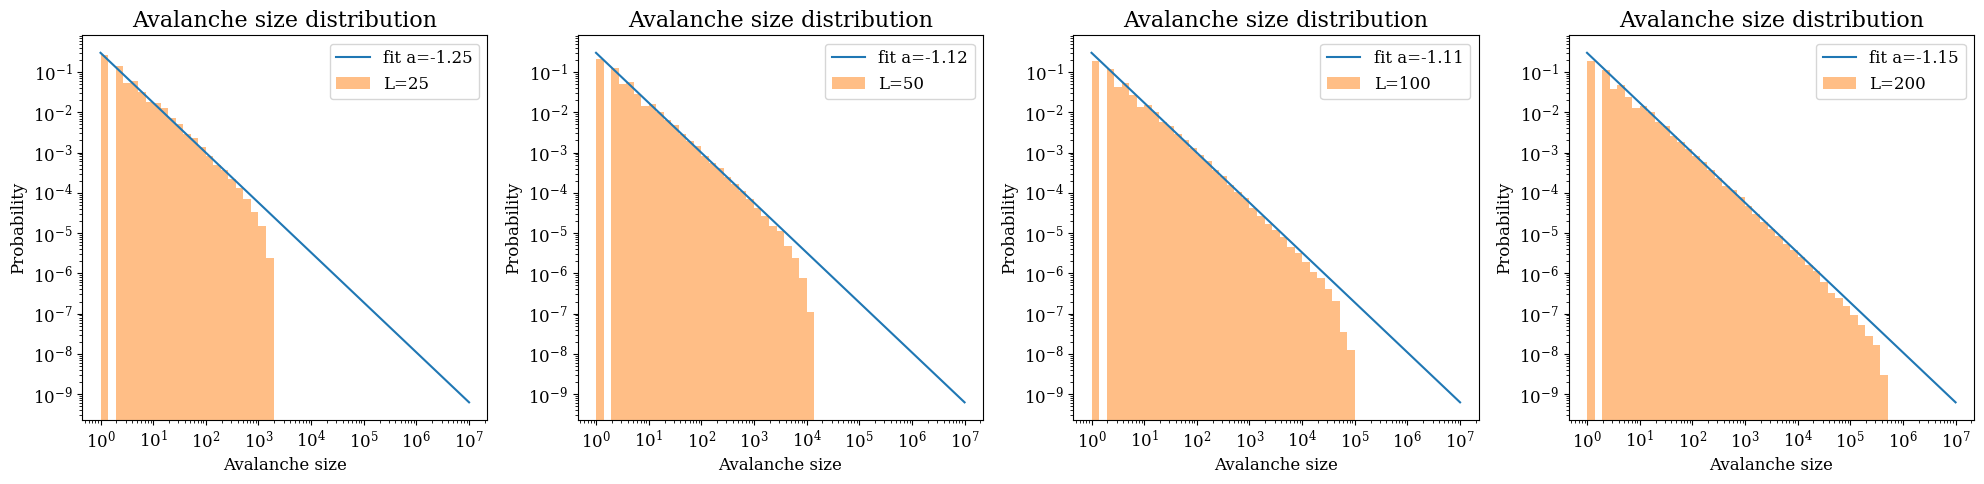

In [28]:
# we now only want the last 20000 values of the ava_size
from scipy.optimize import curve_fit


#now we remove the zeros from the ava_size

for i in range(len(ava_collected)):
    #we take the last 20000 values
    ava_size = ava_collected[i][-20000:]
    #we remove the zeros
    ava_size = ava_size[ava_size != 0]
    ava_collected[i] = ava_size
    
    
#we now want to plt the a normalised histogram of the ava_size with using np.histogram

def Power_law(x, b , a):
    
    return a*x**b 

def fit_power_law(x, y):
    popt, pcov = curve_fit(Power_law, x, y)
    return popt




#now we find x and y value for the plot


fits = []
x_val_hist = []
y_val_hist = []

for idx, avasize in enumerate(ava_collected):
    bins = np.logspace(0,7)
    a = plt.hist(avasize, bins=bins, density=True, alpha=0.5, label=f'L={L[idx]}')[0]
    plt.close()
    b = plt.hist(avasize, bins=bins, density=True, alpha=0.5, label=f'L={L[idx]}')[1]
    b = (b[1:] + b[:-1]) / 2

    
    #filter all values that are zero out of the array
    b = b[a != 0]
    a = a[a != 0]
   
    a = a[:-5]
    b = b[:-5]
    
    x_val_hist.append(b)
    y_val_hist.append(a)
    
    plt.close()
    fit = fit_power_law(b, a)
    fits.append(fit)
    

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
L = [25,50,100,200]
for idx, avasize in enumerate(ava_collected):
    fit = fits[idx]
    
    x = np.logspace(0, 7, 1000)
    
    y = Power_law(x,  -1.24, 0.3 )
    
    axs[idx].plot(x, y, label=f'fit a={fit[0]:.2f}')
    #, b={fit[1]:.2f}')
#L={fit[2]:.2f}
    axs[idx].hist(avasize, bins=bins, density=True, alpha=0.5, label=f'L={L[idx]}')
    axs[idx].set_xscale('log')
    axs[idx].set_yscale('log')
    axs[idx].legend()
    axs[idx].set_xlabel('Avalanche size')
    axs[idx].set_ylabel('Probability')
    axs[idx].set_title('Avalanche size distribution')
    
    
plt.tight_layout()

plt.show()





In [22]:
x_val_hist

[array([  1.19474775,   2.30669676,   3.20514476,   4.4535342 ,
          6.1881657 ,   8.59842837,  11.94747747,  16.60096612,
         23.06696762,  32.05144758,  44.535342  ,  61.88165705,
         85.98428365, 119.47477472, 166.00966116, 230.66967621,
        320.51447578]),
 array([1.19474775e+00, 2.30669676e+00, 3.20514476e+00, 4.45353420e+00,
        6.18816570e+00, 8.59842837e+00, 1.19474775e+01, 1.66009661e+01,
        2.30669676e+01, 3.20514476e+01, 4.45353420e+01, 6.18816570e+01,
        8.59842837e+01, 1.19474775e+02, 1.66009661e+02, 2.30669676e+02,
        3.20514476e+02, 4.45353420e+02, 6.18816570e+02, 8.59842837e+02,
        1.19474775e+03, 1.66009661e+03, 2.30669676e+03]),
 array([1.19474775e+00, 2.30669676e+00, 3.20514476e+00, 4.45353420e+00,
        6.18816570e+00, 8.59842837e+00, 1.19474775e+01, 1.66009661e+01,
        2.30669676e+01, 3.20514476e+01, 4.45353420e+01, 6.18816570e+01,
        8.59842837e+01, 1.19474775e+02, 1.66009661e+02, 2.30669676e+02,
        3.2051

In [17]:
#remove last 10 element from a 


39

Text(0.5, 1.0, 'Avalanche size distribution')

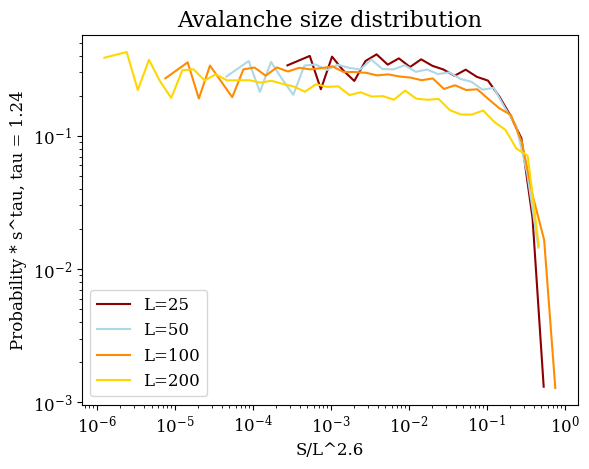

In [67]:
fits = []
x_val_hist = []
y_val_hist = []

for idx, avasize in enumerate(ava_collected):
    bins = np.logspace(0,7)
    a = plt.hist(avasize, bins=bins, density=True, alpha=0.5, label=f'L={L[idx]}')[0]
    plt.close()
    b = plt.hist(avasize, bins=bins, density=True, alpha=0.5, label=f'L={L[idx]}')[1]
    b = (b[1:] + b[:-1]) / 2
    
   
    #filter all values that are zero out of the array
    b = b[a != 0]
    a = a[a != 0]
    x_val_hist.append(b)
    y_val_hist.append(a)
    
    plt.close()
    fit = fit_power_law(b, a)
    fits.append(fit)
for i in range(4):
    y_val_hist[i] = y_val_hist[i]*x_val_hist[i]**1.24
    x_val_hist[i] = x_val_hist[i]/L[i]**2.6
    
    plt.plot(x_val_hist[i], y_val_hist[i], label=f'L={L[i]}')
    #make log scale
    plt.xscale('log')
    plt.yscale('log')
#plot line at x = 0.3 and y = 0 to 10^(-5)

plt.legend()
plt.xlabel('S/L^2.6')
plt.ylabel('Probability * s^tau, tau = 1.24')
plt.title('Avalanche size distribution')
    
    
    

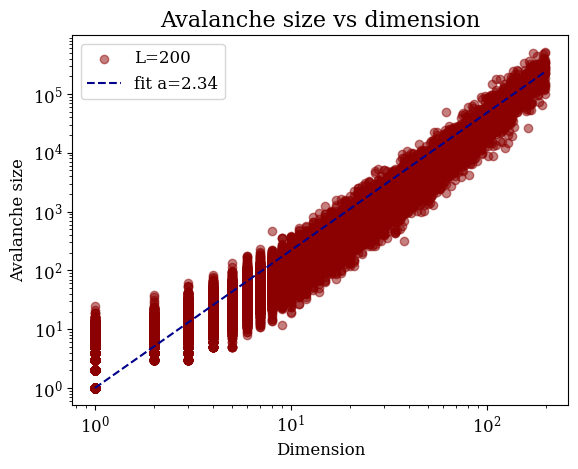

In [71]:
dim_200 = df1[names1[0]]
ava_200 = df1[names1[1]]    

#drop 0 values
dim_200 = dim_200[ava_200 != 0] + np.ones(len(dim_200[ava_200 != 0]))
ava_200 = ava_200[ava_200 != 0]



plt.scatter(dim_200, ava_200, color='darkred', label='L=200', alpha=0.5)

plt.xlabel('Dimension')
plt.ylabel('Avalanche size')
#fit a power law to the data
def Power_law_simple(x, b):
    return x**b

popt, pcov = curve_fit(Power_law_simple, dim_200, ava_200)


x = np.linspace(1, 200, 1000)
y = Power_law_simple(x, *popt)
plt.plot(x, y, label=f'fit a={popt[0]:.2f}', color =  'darkblue', linestyle='--')
plt.legend()
#log scale
plt.yscale('log')
plt.xscale('log')
plt.title('Avalanche size vs dimension')

plt.show()


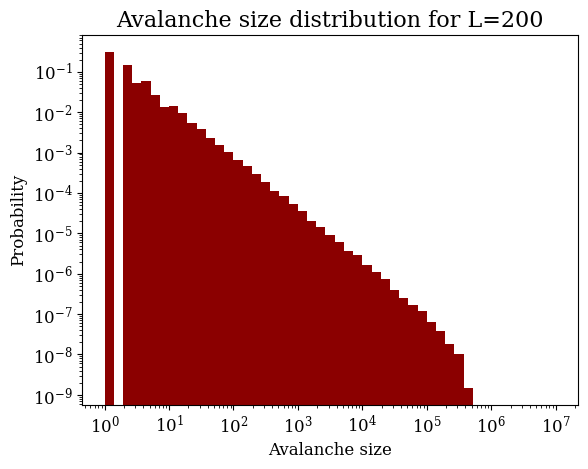

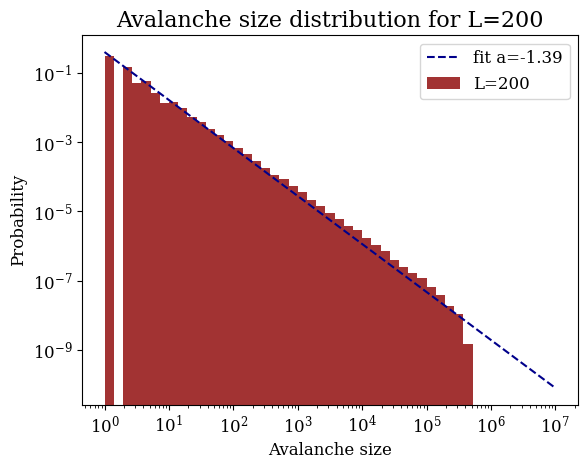

Text(0, 0.5, 'Probability')

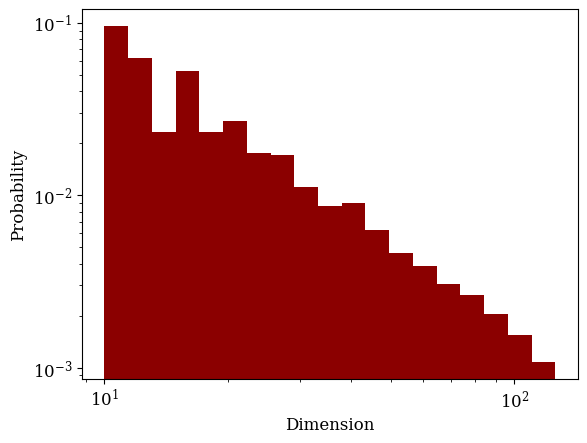

In [91]:
bins = np.logspace(0,7)
plt.hist(ava_200, bins=bins, alpha=1, color='darkred', label='L=200', density=True)
#log scale

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Avalanche size')
plt.ylabel('Probability')

plt.title('Avalanche size distribution for L=200')
plt.show()
#let us fit the power law to the data, except for the last 5 values which is not zero. First remove the zeros from the data

#fit the power law to the data

def Power_law(x, b , a):
        
        return a*x**b
def fit_power_law(x, y):
    popt, pcov = curve_fit(Power_law, x, y)
    return popt

bins = np.logspace(0,7)
a = plt.hist(ava_200, bins=bins, density=True, alpha=0.5, label='L=200')[0]
plt.close()
b = plt.hist(ava_200, bins=bins, density=True, alpha=0.5, label='L=200')[1]
b = (b[1:] + b[:-1]) / 2
#filter all values that are zero out of the array
b = b[a != 0]
a = a[a != 0]
plt.close()
fit = fit_power_law(b, a)

x = np.logspace(0, 7, 1000)
y = Power_law(x, *fit)
plt.plot(x, y, label=f'fit a={fit[0]:.2f}', color =  'darkblue', linestyle='--')
plt.hist(ava_200, bins=bins, density=True, alpha=0.8, label='L=200')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Avalanche size')
plt.ylabel('Probability')
plt.title('Avalanche size distribution for L=200')
plt.show()







#make a plot of the dimensions as well
bins = np.logspace(1, 2.1, 20)
plt.hist(dim_200, bins=bins, alpha=1, color='darkred', label='L=200', density=True)
plt.xscale('log')
plt.xlabel('Dimension')
plt.yscale('log')
plt.ylabel('Probability')



0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
59995    788.0
59996     10.0
59997    717.0
59998    146.0
59999     38.0
Name: ava_s_4, Length: 60000, dtype: float64